In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# read in iris data
iris = load_iris()

# create X and y
X = iris.data
y = iris.target

In [3]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [5]:
# check classification accuracy of KNN with k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


What if we created a bunch of train/test splits, calculated the testing accuracy for each, averaged the results together?

- That's the essence of cross-validation!

Steps:

1. Split the dataset into K equal partitions

2. Use fold 1  as the testing set and the union of the other folds as the training set

3. Calcualte testing accuracy

4. Repeat steps 2 and 3 K times, using different fold as the testing set each time.

5. Use the average testing accuracy as the estimate of the out-of-sample accuracy


In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
# 10 fold cross validation with K = 5 for KNN

knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
# use average accuracy as an estimate of out of sample accuracy
print(scores.mean())

0.9666666666666668


In [11]:
# search for an optimal value of k for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [12]:
import pandas as pd

In [20]:
k_id = list(range(1, 31))

In [21]:
dic = {'k_id':k_id, 'scores' : k_scores}

In [26]:
df = pd.DataFrame(dic)
df

df.sort_values(['scores', 'k_id'], ascending = [False, True])

,k_id,scores
12,13,0.980000
17,18,0.980000
19,20,0.980000
8,9,0.973333
11,12,0.973333
13,14,0.973333
14,15,0.973333
15,16,0.973333
16,17,0.973333
18,19,0.973333


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

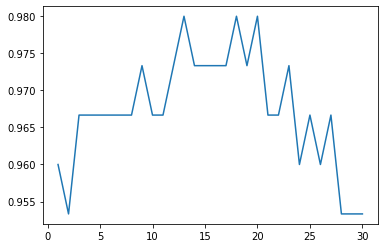

In [28]:
# plot the value of K of KNN(x axis) versus the cross-validated accuracy
plt.plot(k_range, k_scores)

## KNN vs Logistic Regression

### KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors = 20)
cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean()

0.9800000000000001

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy').mean()

0.9533333333333334

**Goal:** Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [36]:
link = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(link)

In [37]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [39]:
# create a Python list of three features
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to slect a subsect of the DataFrame
X = data[feature_cols]

# Sales as response
y = data.Sales

In [44]:
from sklearn.linear_model import LinearRegression
# 10 fold cross validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10,
                         scoring = 'neg_mean_squared_error' )
print(scores)


[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [47]:
# fixt the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [50]:
import numpy as np
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [51]:
# average rmse
rmse_scores.mean()

1.6913531708051797